In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
from astropy.time import Time
from pathlib import Path
import scipy

import setigen as stg

IMG_DIR = Path("../../docs/source/images/")

In [2]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

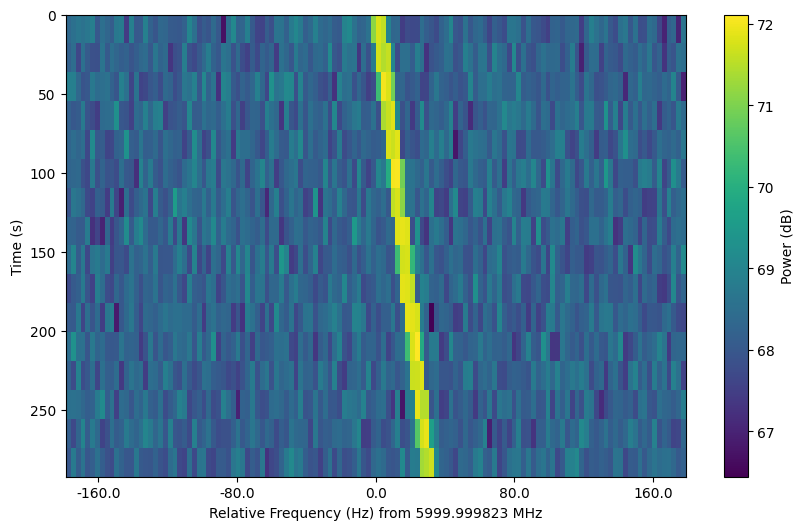

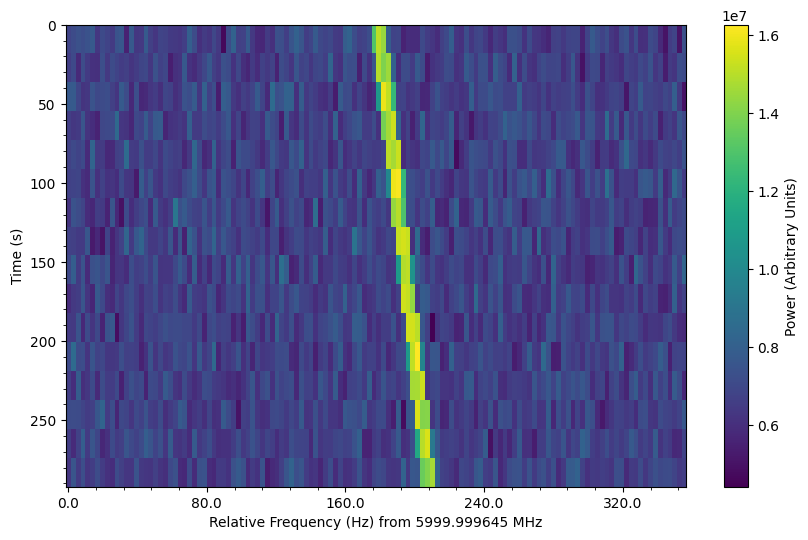

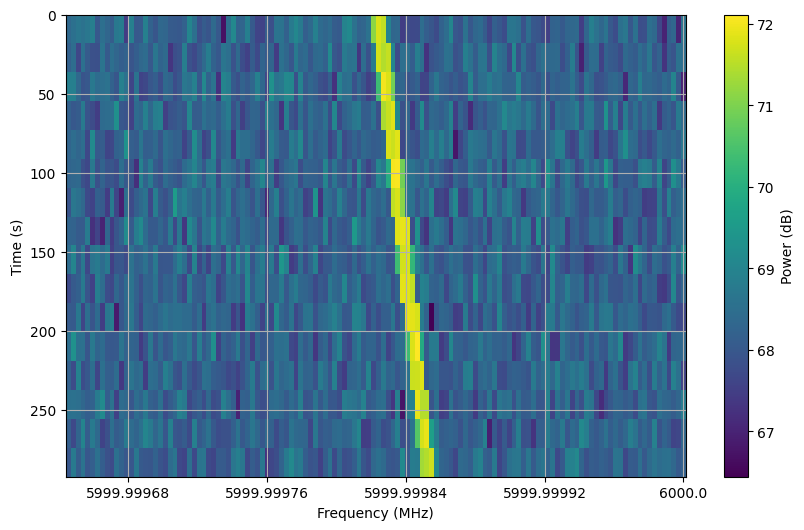

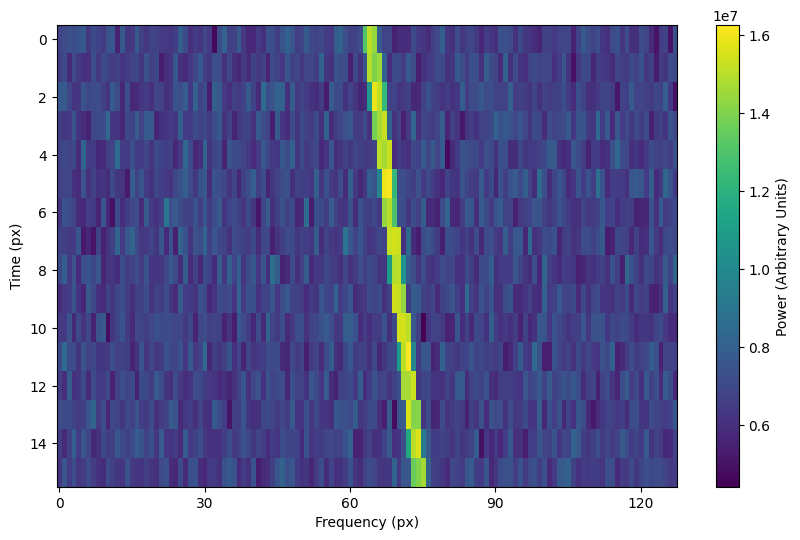

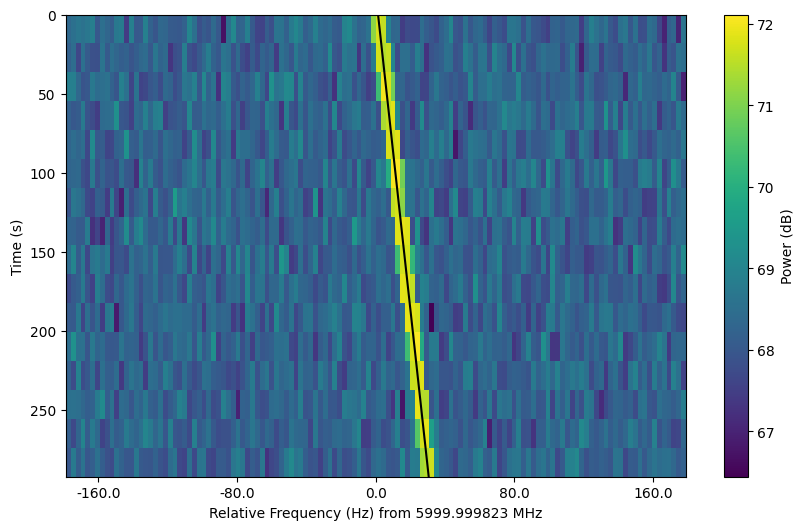

In [11]:
fr = stg.Frame(tchans=16, fchans=128)
fr.add_noise_from_obs()
drift_rate = 0.1
fr.add_signal(stg.constant_path(f_start=fr.get_frequency(index=fr.fchans//2),
                           drift_rate=0.1),
                stg.constant_t_profile(level=fr.get_intensity(snr=50)),
                stg.box_f_profile(width=3*fr.df),
                doppler_smearing=True)

plt.figure(figsize=(10, 6))
fr.plot(xtype="fmid", db=True)
# plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmid, fr.ts_ext)
plt.savefig(IMG_DIR / "plot_fmid.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
fr.plot(xtype="fmin", db=False, minor_ticks=True)
# plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmin, fr.ts_ext)
plt.savefig(IMG_DIR / "plot_fmin.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
fr.plot(xtype="f", grid=True)
# plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2), fr.ts_ext)
plt.savefig(IMG_DIR / "plot_f.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
fr.plot(xtype="px", db=False)
# plt.plot(fr.ts * drift_rate / fr.df + fr.fchans//2, fr.ts / fr.dt)
plt.savefig(IMG_DIR / "plot_px.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
fr.plot(xtype="fmid", db=True)
plt.plot(fr.ts_ext * drift_rate + fr.get_frequency(index=fr.fchans//2) - fr.fmid, 
         fr.ts_ext,
         c='k')
plt.savefig(IMG_DIR / "plot_fmid_line.png", bbox_inches='tight')
plt.show()